In [34]:
from PIL import Image
import matplotlib.pyplot as plt
import os

In [35]:
image_folder = "custom_data/source"
output_folder = "custom_data"

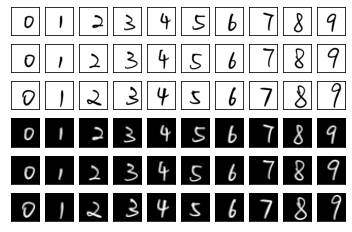

In [36]:
def crop_and_save(image_folder, output_folder, page_number=1, row_per_page=1):
    for page in range(1, page_number + 1):
        image_path = f"{image_folder}/page_{page}.png"
        image = Image.open(image_path)
        
        # width, height = image.size
        width_margin_left = 385
        height_margin_top = 200
        
        digit_width = 112
        digit_height = 112

        # Loop through and crop each digit
        for row in range(row_per_page):
            for i in range(10):
                left = width_margin_left + i * digit_width
                upper = height_margin_top + row * digit_height
                right = left + digit_width
                lower = upper + digit_height

                # Crop out the sub-image containing the digit
                original_digit = image.crop((left, upper, right, lower))

                # Resize the image to 28x28
                digit_image = original_digit.resize((28, 28))
                
                # Convert to grayscale and color inversion
                digit_image = digit_image.convert("L")
                digit_image = Image.eval(digit_image, lambda x: 255 - x)

                # Show the digits
                if page == 1 and row < 3:
                    plt.subplot(6, 10, row * 10 + i + 1)
                    plt.imshow(original_digit)
                    ax = plt.gca()
                    ax.axes.xaxis.set_visible(False)
                    ax.axes.yaxis.set_visible(False)
                    
                    plt.subplot(6, 10, row * 10 + i + 1 + 10 * 3)
                    plt.imshow(digit_image, cmap="gray")
                    ax = plt.gca()
                    ax.axes.xaxis.set_visible(False)
                    ax.axes.yaxis.set_visible(False)

                # Save the image
                save_folder = f"{output_folder}/{i}"
                if not os.path.exists(save_folder):
                    os.makedirs(save_folder)
                
                img_num = (page - 1) * row_per_page + row
                digit_image.save(f"{save_folder}/img_{img_num}.png")


crop_and_save(image_folder, output_folder, page_number=2, row_per_page=19)